<a href="https://colab.research.google.com/github/salazarmaria/Notas-de-IA/blob/main/Clasificaci%C3%B3n_de_Ropa/notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np   # Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist # Cargar dataset Fashion MNIST

In [3]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Lista con los nombres de las clases

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Separar datos de entrenamiento y prueba

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
index = 10 # Elegir un índice específico

In [7]:
image = train_images[index] # Imagen correspondiente
label = train_labels[index] # Etiqueta correspondiente

In [8]:
print(image) # Mostrar los valores de píxeles de la imagen

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

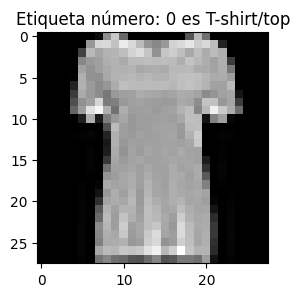

In [9]:
plt.figure(figsize=(3, 3)) # Mostrar la imagen con título indicando la etiqueta
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

In [10]:
print(train_images.shape) # Revisar dimensiones de los datos
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0 # Normalizar imágenes
test_images = test_images / 255.0

In [12]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Capa convolucional 1
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'), # Capa convolucional 2
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # Capa convolucional 3
    Flatten(),
    Dense(64, activation='relu'), # Capa oculta densa
    Dense(10)  # Capa de salida (10 clases)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [14]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # Compilar el modelo

In [15]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels)) # Entrenar el modelo

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.7506 - loss: 0.6799 - val_accuracy: 0.8744 - val_loss: 0.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8800 - loss: 0.3253 - val_accuracy: 0.8899 - val_loss: 0.3032
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8975 - loss: 0.2765 - val_accuracy: 0.8922 - val_loss: 0.2935
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.9119 - loss: 0.2412 - val_accuracy: 0.8955 - val_loss: 0.2894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9161 - loss: 0.2202 - val_accuracy: 0.9015 - val_loss: 0.2662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - accuracy: 0.9277 - loss: 0.1962 - val_accuracy: 0.9046 - val_loss: 0.2625
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9345 - loss: 0.1747 - val_accuracy: 0.9025 - val_loss: 0.2748
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9397 -

In [16]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.9080 - loss: 0.2882


In [17]:
probability_model = Sequential([model, Softmax()]) # Crear modelo de probabilidades
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [18]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

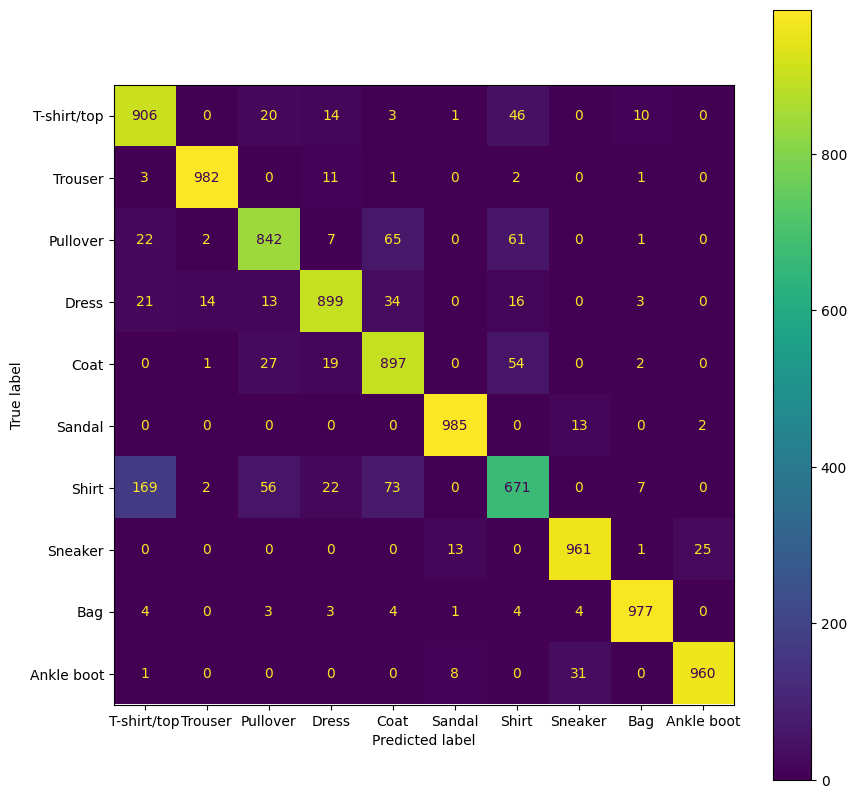

In [19]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

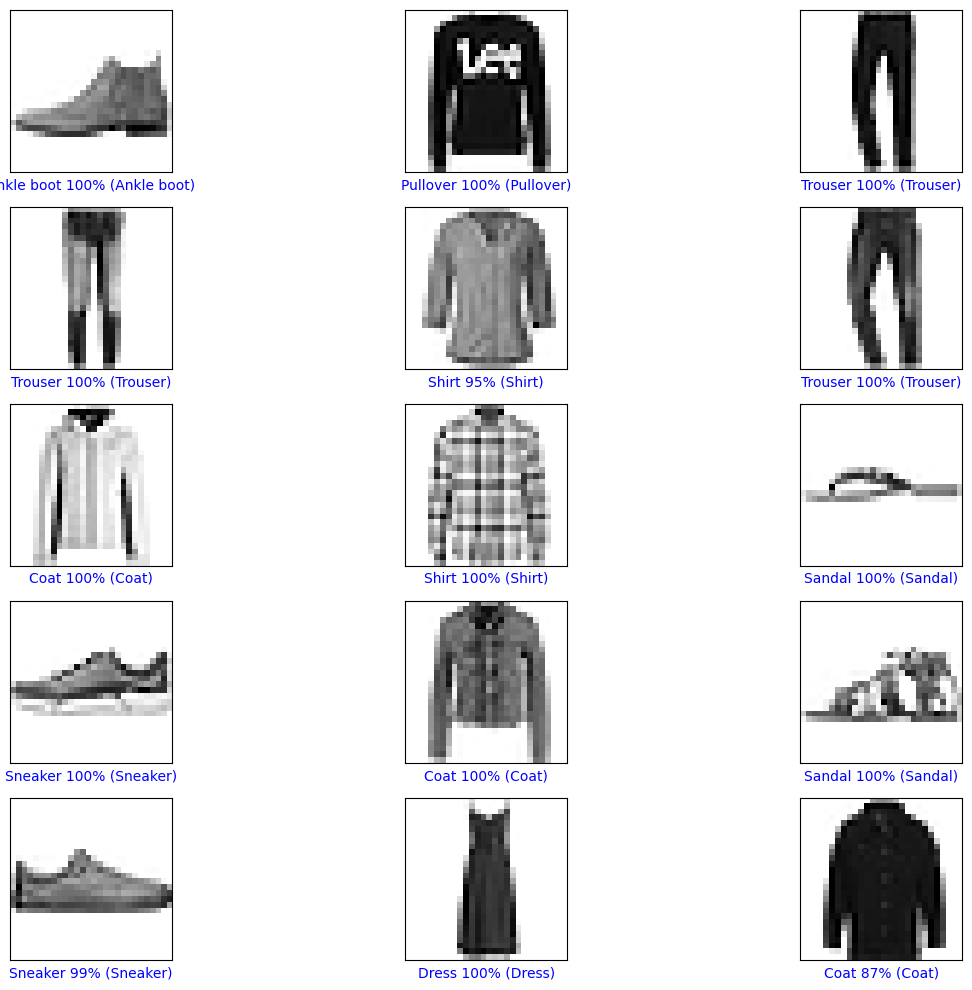

In [20]:
def plot_image(i, predictions_array, true_label, img):  # Función para graficar imágenes con predicciones
    true_label, img = true_label[i], img[i]
    plt.grid(False) # Quitar cuadrícula
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary) # Mostrar imagen

    predicted_label = tf.argmax(predictions_array).numpy() # Etiqueta predicha
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red' # Color según acierto o error

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)  # Mostrar predicción, probabilidad y etiqueta real

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()